<a href="https://www.kaggle.com/code/vasileiosouzas/eda-car-price?scriptVersionId=296455661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cars-pre/car_price_prediction_.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/cars-pre/car_price_prediction_.csv")
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


# 🔎Familiarizing with the Data

In [3]:
df.head() #getting the first five rows of the data frame
#df.tail() #last five

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [4]:
df.columns #get all the columns' names

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [5]:
print(df.index) #get data type/lenght
print(df.dtypes)

RangeIndex(start=0, stop=2500, step=1)
Car ID            int64
Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object


In [6]:
df.info #get an overall idea of how the data looks/works. Info about each column and the data type of each one of them
#df.info(memory_usage="deep") #use this command to view the memory usage of the dataframe

<bound method DataFrame.info of       Car ID   Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
0          1   Tesla  2016          2.3    Petrol       Manual   114832   
1          2     BMW  2018          4.4  Electric       Manual   143190   
2          3    Audi  2013          4.5  Electric       Manual   181601   
3          4   Tesla  2011          4.1    Diesel    Automatic    68682   
4          5    Ford  2009          2.6    Diesel       Manual   223009   
...      ...     ...   ...          ...       ...          ...      ...   
2495    2496    Audi  2020          2.4    Petrol    Automatic    22650   
2496    2497    Audi  2001          5.7    Hybrid       Manual    77701   
2497    2498    Ford  2021          1.1    Hybrid       Manual   272827   
2498    2499    Audi  2002          4.5    Diesel       Manual   229164   
2499    2500  Toyota  2005          4.6    Diesel    Automatic    80978   

     Condition     Price     Model  
0          New  26613.92   Mod

# 🟢 Data Quality

This section is responsible for *minimizing/eradicating any noice in the dataset, including outliers/missing values/duplicate data* 

In [7]:
df = df.drop(['Car ID'], axis=1 ) #subsetting the dataframe to be more readable (removing any unnecessary columns)

➡️ Checking for outliers

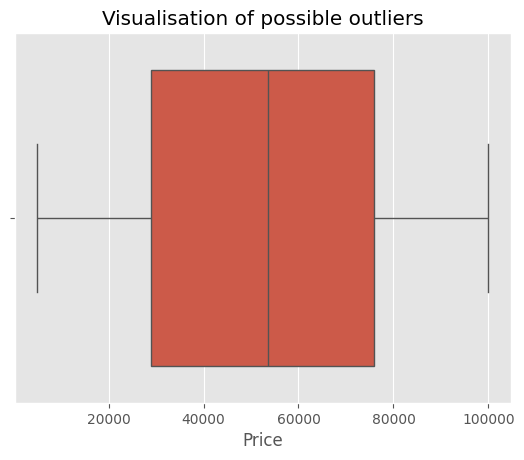

In [8]:
sns.boxplot(x=df["Price"])
plt.title("Visualisation of possible outliers")
plt.show()

The plot above demonstrates the range of the prices and shows any extreme values (outliers).

Obviously, we don't have any outliers in this case.

➡️ Checking for any null values

In [9]:
df.isna().sum() 

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

➡️ Checking for any duplicated rows

In [10]:
df.loc[df.duplicated()] 
df.duplicated().sum() 

np.int64(0)

# ⚠️ Logical Error inside the data

If you observe the head of the dataframe you can see that there are some logical inconsistencies.
There are some Tesla branded cars that have petrol/diesel Fuel Type. Although this could be possible, having multiple entries isn't normal.
Since Tesla cars are by default electric, we are going to remove all the entries without Electric Fuel Type.

In [11]:
invalid_tesla = df[
    (df["Brand"] == "Tesla") &
    (df["Fuel Type"].isin(["Diesel", "Petrol"]))
]

df = df[~(
    (df["Brand"] == "Tesla") &
    (df["Fuel Type"].isin(["Diesel", "Petrol"]))
)]
df

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
5,Audi,2019,2.4,Diesel,Automatic,246553,Like New,88969.76,Q7
6,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5
...,...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [12]:
len(invalid_tesla) #This command lets me know how many rows contain this logical error.

163

since we lost a lot of entries I will check how many electric Tesla branded cars are still in the dataframe

In [13]:
df['Fuel Type'].unique()
df.loc[(df['Fuel Type'] == 'Electric') & (df['Brand'] == 'Tesla')]
#((df["Fuel Type"] == "Electric") & (df["Brand"] == "Tesla")).sum()
# As you can see, there are entries that have electric Fuel Type and a Manual Transmission, which mechanicaly impossible. 
# As much I would like to remove all these entries I am not going to do that since the entire dataframe is synthetic and there is no reason bothering

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
69,Tesla,2000,4.7,Electric,Manual,221576,Like New,7690.81,Model X
101,Tesla,2011,3.0,Electric,Manual,242721,Like New,80199.63,Model S
108,Tesla,2016,4.3,Electric,Manual,128614,Used,24507.29,Model 3
122,Tesla,2020,2.5,Electric,Automatic,197170,Like New,28996.53,Model S
136,Tesla,2014,4.4,Electric,Automatic,204580,Used,7292.61,Model 3
...,...,...,...,...,...,...,...,...,...
2351,Tesla,2014,2.6,Electric,Automatic,48929,Used,84027.26,Model 3
2359,Tesla,2002,2.2,Electric,Manual,21825,Like New,84320.65,Model Y
2380,Tesla,2012,3.7,Electric,Automatic,63528,Like New,97907.73,Model S
2435,Tesla,2014,3.5,Electric,Manual,179238,New,81730.61,Model Y


# 📊 DATA - min/max/mean/std

For the initial investigation of the data set, basic descriptive statistics are calculated such as min/max/mean/std for the different values of "Price"


In [14]:
df['Price'].min()

5011.27

In [15]:
df['Price'].max()

99982.59

In [16]:
df['Price'].std()

27230.47766602547

In [17]:
df['Price'].mean()

np.float64(52508.11265725289)

In [18]:
price_agg = df.groupby('Brand')['Price'].agg(['min', 'max', 'mean', 'std'])
print(price_agg)

              min       max          mean           std
Brand                                                  
Audi      5011.27  99982.59  51953.424810  27389.130733
BMW       5107.22  99968.62  54157.114385  27491.828807
Ford      5247.71  99605.33  51593.254813  27006.331424
Honda     5060.75  99578.74  52050.283949  25979.965526
Mercedes  5353.03  99754.42  53191.090085  28350.536294
Tesla     5343.23  99905.90  52572.397135  27702.414412
Toyota    5472.39  99400.47  52078.728235  27000.903473


In [19]:
#overview
df.describe()

,Year,Engine Size,Mileage,Price
count,2337.000000,2337.000000,2337.000000,2337.000000
mean,2011.659392,3.478348,149848.876765,52508.112657
std,6.997886,1.426904,87458.440750,27230.477666
min,2000.000000,1.000000,15.000000,5011.270000
25%,2005.000000,2.200000,72534.000000,28940.540000
50%,2012.000000,3.500000,149333.000000,53463.160000
75%,2018.000000,4.700000,224589.000000,75621.020000
max,2023.000000,6.000000,299967.000000,99982.590000


# 🔎 Linearity and Similarity of the data

Linearity - Pearson correlation 

In [20]:
numeric_df = df.select_dtypes(include="number")
numeric_df.head(15)

,Year,Engine Size,Mileage,Price
1,2018,4.4,143190,14679.61
2,2013,4.5,181601,44402.61
4,2009,2.6,223009,73577.10
5,2019,2.4,246553,88969.76
6,2020,4.0,135486,63498.75
7,2017,5.3,83030,17381.19
8,2023,5.7,120360,15905.62
9,2010,1.5,135009,9560.22
11,2017,5.7,169737,28074.19
12,2006,4.7,114360,74766.45


In [21]:
numeric_cols = ['Year', 'Engine Size', 'Mileage', 'Price']
corr = df[numeric_cols].corr(method='pearson')
print(corr)

                 Year  Engine Size   Mileage     Price
Year         1.000000     0.013237 -0.006959 -0.038313
Engine Size  0.013237     1.000000 -0.016004 -0.015149
Mileage     -0.006959    -0.016004  1.000000 -0.011831
Price       -0.038313    -0.015149 -0.011831  1.000000


Similarity - Cosine similarity

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(df[numeric_cols])
print(f"Mean cosine similarity: {similarity.mean():.4f}")

Mean cosine similarity: 0.8714


# 🔍 Normalization & Dimensionality Reduction

Normalization:

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])
print(f"Scaled data shape: {df_scaled.shape}")
print(f"Mean after scaling: {df_scaled.mean(axis=0)}")  
print(f"Std after scaling: {df_scaled.std(axis=0)}")

Scaled data shape: (2337, 4)
Mean after scaling: [ 2.07507667e-16  3.30644084e-17  7.29697290e-17 -2.28030403e-18]
Std after scaling: [1. 1. 1. 1.]


- All numerical features were standardized using StandardScaler (mean=0, std=1) to ensure equal contribution in downstream analysis and prevent scale-dependent bias in ML algorithms.

- We apply PCA to reduce the dimensionality of our 4 numerical features (Year, Engine Size, Mileage, Price) into 2 principal components. This transformation helps us visualize the data structure in 2D and identify underlying patterns or relationships between features

In [25]:
pca = PCA(n_components=2)  # reduce from 4 features to 2 components
df_pca = pca.fit_transform(df_scaled)
print(f"PCA shape: {df_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

#this part bellow is dedicated to showing how PCA works
print("=== PCA COMPONENTS ===")
components_df = pd.DataFrame(
    pca.components_,
    columns=['Year', 'Engine Size', 'Mileage', 'Price'],
    index=['PC1', 'PC2']
)
print(components_df)

PCA shape: (2337, 2)
Explained variance ratio: [0.26178373 0.2535161 ]
Total variance explained: 0.5153
=== PCA COMPONENTS ===
         Year  Engine Size   Mileage     Price
PC1  0.645744     0.411998 -0.074959 -0.638477
PC2  0.068104    -0.485268  0.803276 -0.338562


- The 2 components retain 51.53% of the total variance, indicating that the original features contain relatively independent information

- PC1: Newer year, bigger engine size but lower price. This is strange since most of the times, newer cars mean greater price.
    This shows that there are strong depreciation paterns. 

- PC2: More Mileage, smaller engine size and lower price. This is the expected outcome

- 51% variance means that the data are complex and that they don't have a strong linear relationships. Otherwise, we would be seeing a variance  arround ~90%

# 🖼️ Data Visualization 

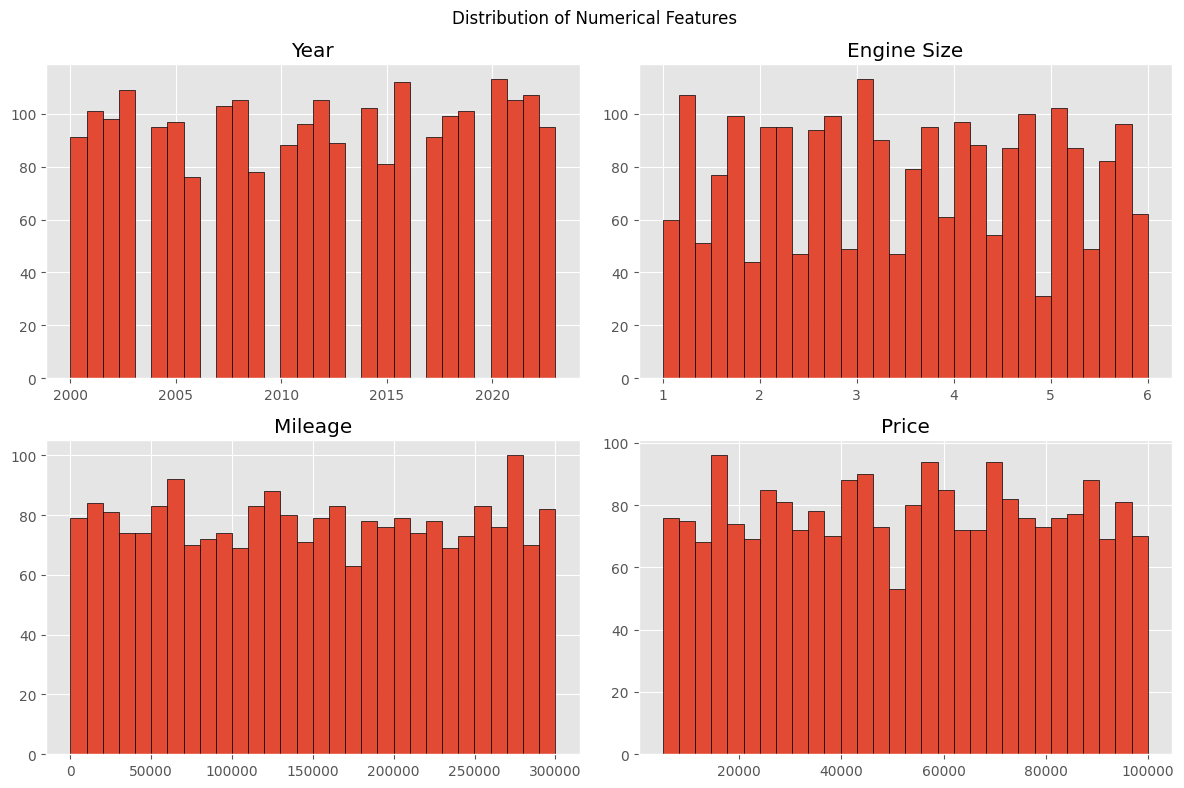

In [26]:
df[numeric_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

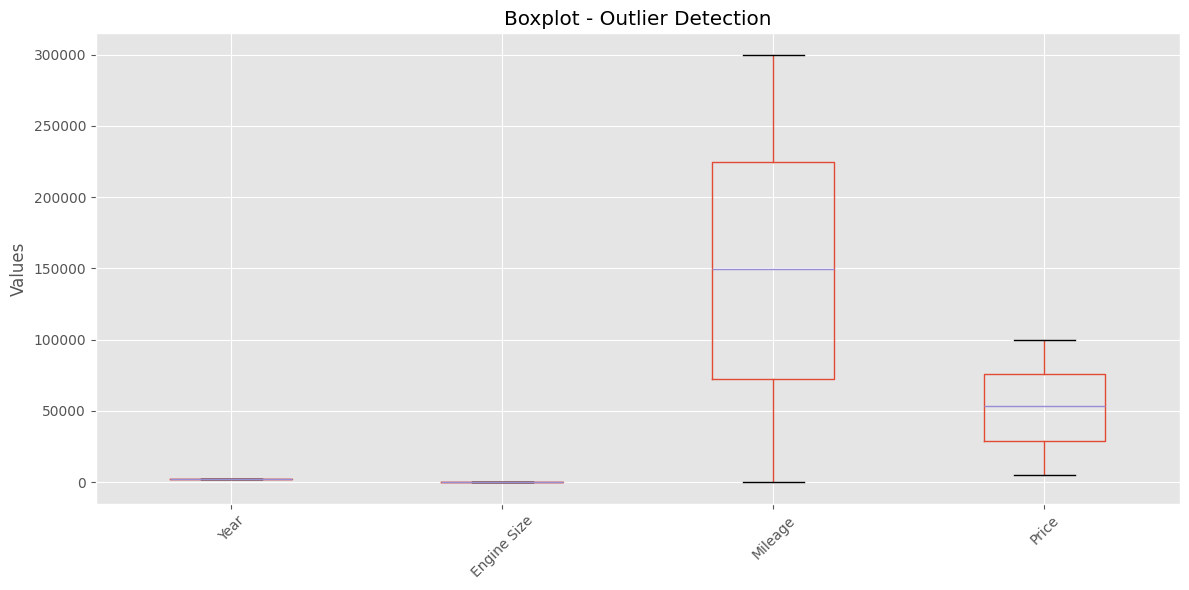

In [27]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title('Boxplot - Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

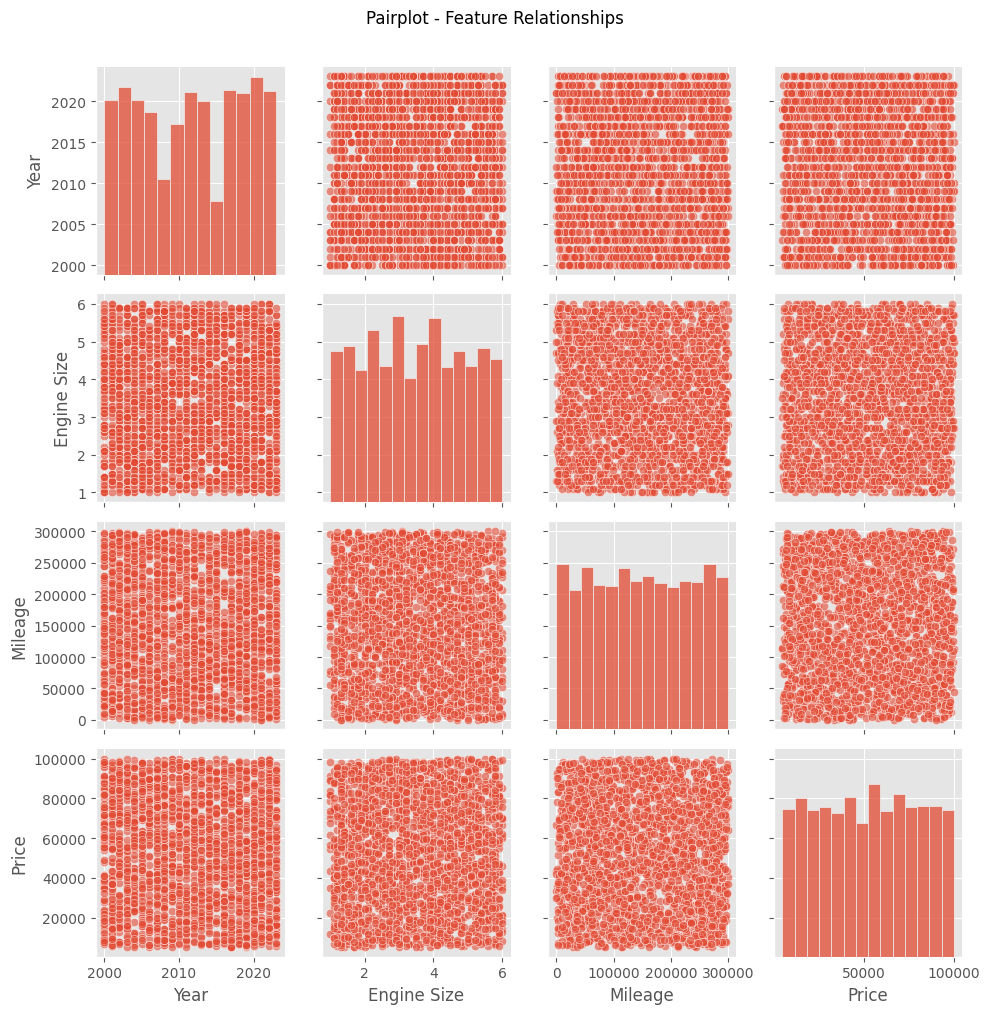

In [28]:
sns.pairplot(df[numeric_cols], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Feature Relationships', y=1.01)
plt.tight_layout()
plt.show()


- The pairplot analysis confirms the absence of linear relationships between numerical features. All scatter plots show random, cloud-like distributions with no discernible trends. No natural clusters are visible, suggesting that price determination requires consideration of categorical features (Brand, Condition) beyond the numerical attributes

In [29]:
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                 Year  Engine Size   Mileage     Price
Year         1.000000     0.013237 -0.006959 -0.038313
Engine Size  0.013237     1.000000 -0.016004 -0.015149
Mileage     -0.006959    -0.016004  1.000000 -0.011831
Price       -0.038313    -0.015149 -0.011831  1.000000


- The correlation matrix reveals exceptionally weak linear relationships across all features. The strongest correlation is Year-Price at -0.038, which is practically negligible

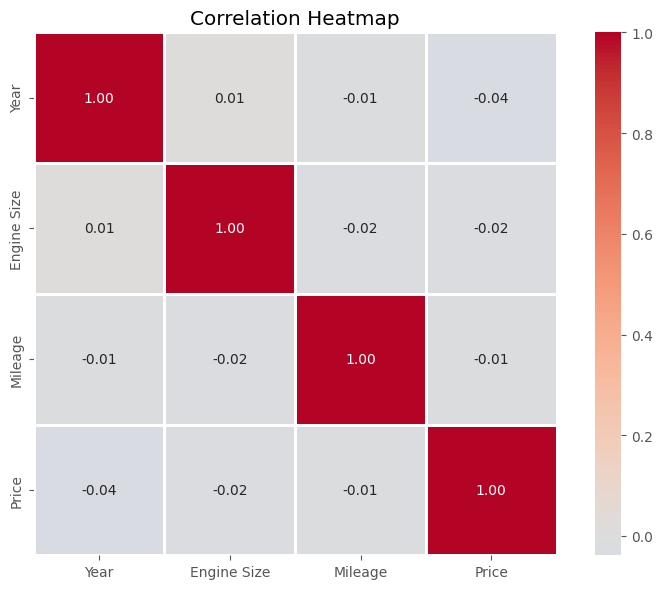

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

- As you can see from the heatmap above, there is none to any linear relationships between the data. All pricees are around 0.01 and -0.04 which is practically zero. All features are independed and thesee findings, align with the PCA results confirming that the data lacks strong linear structure and requires more complex modeling approaches. 

## To Conclude: 

As another researcher that worked on this dataset mentioned, although the data contains no missing values, perfect data types and consistent formatting, it has logical flaws. "CLEAN DATA IS NOT ALWAYS REAL DATA" . This dataset can be used in order to help newcomers in the industry of data exploration and people who want to practice .It is not capable of being used by people who want to do real work. Thank you for your time!